<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_prediction.csv to sample_prediction.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.ensemble import RandomForestRegressor
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

In [ ]:
sample = pd.read_csv('sample_prediction.csv')

In [ ]:
sample.head()

,id,price
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,LATITUDE,LONGITUDE,PARCELNO,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,Price
0,25.687729,-80.455244,3049320200070,4489,1631,1296,8122.6,55728.9,47450.5,92251.8,46679.7,21758.8,21,0,6,4,280000.0
1,25.581848,-80.383012,3069010080370,9800,1879,3226,4175.6,24786.4,4965.5,94510.6,44959.7,5299.5,46,0,2,2,230000.0
2,25.502964,-80.426432,3079030020070,16976,1340,3950,20852.3,28433.7,20546.3,125715.6,76931.2,3018.7,33,0,8,2,165000.0
3,25.596150,-80.439149,3059330330220,6300,2253,512,1329.5,42892.8,23145.8,104312.4,53242.7,20337.7,3,0,8,4,341000.0
4,25.466384,-80.425023,1079150190470,7649,3445,550,17689.7,27889.0,16524.3,136247.9,88639.3,5923.3,0,0,8,2,369400.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           9334 non-null   float64
 1   LONGITUDE          9334 non-null   float64
 2   PARCELNO           9334 non-null   int64  
 3   LND_SQFOOT         9334 non-null   int64  
 4   TOT_LVG_AREA       9334 non-null   int64  
 5   SPEC_FEAT_VAL      9334 non-null   int64  
 6   RAIL_DIST          9334 non-null   float64
 7   OCEAN_DIST         9334 non-null   float64
 8   WATER_DIST         9334 non-null   float64
 9   CNTR_DIST          9334 non-null   float64
 10  SUBCNTR_DI         9334 non-null   float64
 11  HWY_DIST           9334 non-null   float64
 12  age                9334 non-null   int64  
 13  avno60plus         9334 non-null   int64  
 14  month_sold         9334 non-null   int64  
 15  structure_quality  9334 non-null   int64  
 16  Price              9334 

In [ ]:
train = train.drop('PARCELNO',axis=1)

In [ ]:
train.head()

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,Price
0,25.687729,-80.455244,4489,1631,1296,8122.6,55728.9,47450.5,92251.8,46679.7,21758.8,21,0,6,4,280000.0
1,25.581848,-80.383012,9800,1879,3226,4175.6,24786.4,4965.5,94510.6,44959.7,5299.5,46,0,2,2,230000.0
2,25.502964,-80.426432,16976,1340,3950,20852.3,28433.7,20546.3,125715.6,76931.2,3018.7,33,0,8,2,165000.0
3,25.596150,-80.439149,6300,2253,512,1329.5,42892.8,23145.8,104312.4,53242.7,20337.7,3,0,8,4,341000.0
4,25.466384,-80.425023,7649,3445,550,17689.7,27889.0,16524.3,136247.9,88639.3,5923.3,0,0,8,2,369400.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


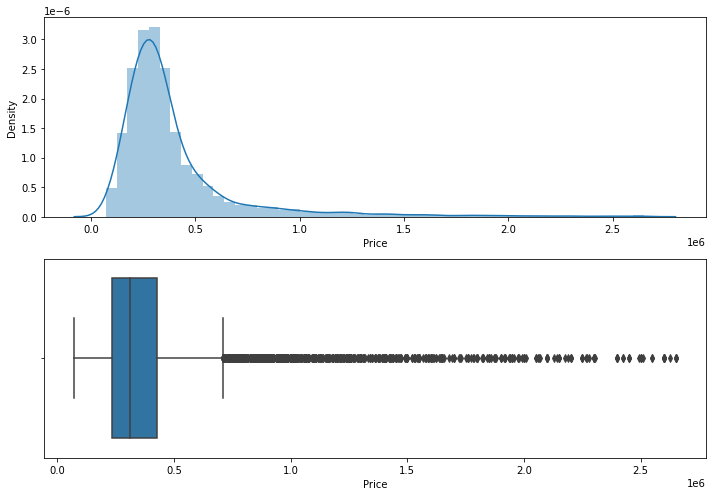

In [ ]:
#visualizing house prices

fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(train['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(train['Price'])
plt.tight_layout()

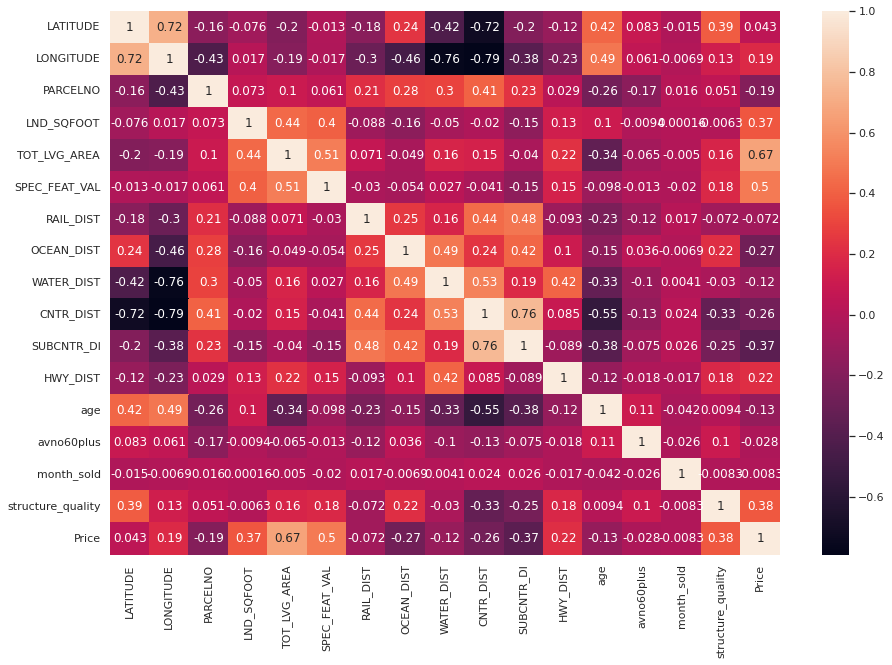

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(train.corr(), annot=True)

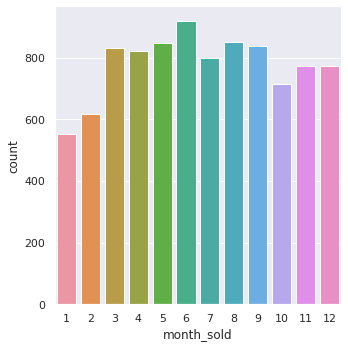

In [ ]:
sns.catplot(x='month_sold', data=train, kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

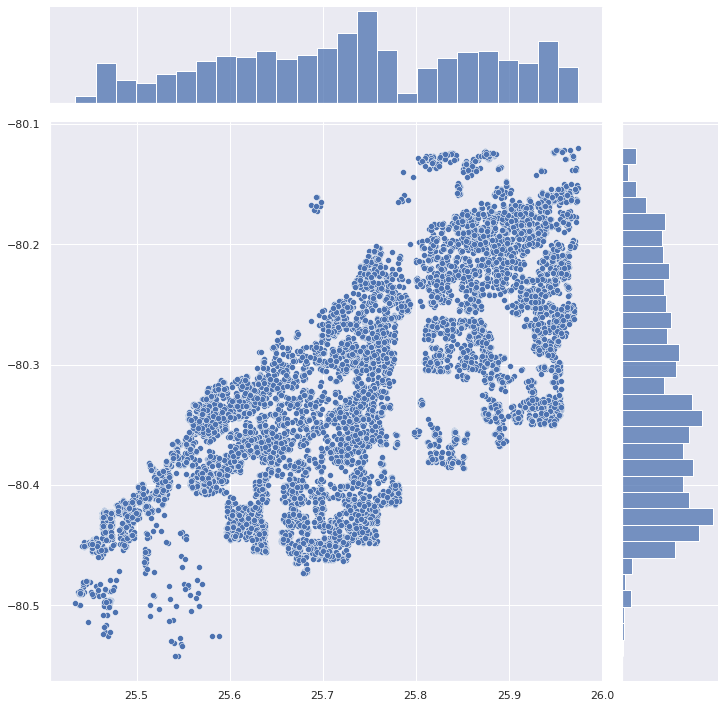

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train.LATITUDE.values, y=train.LONGITUDE.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

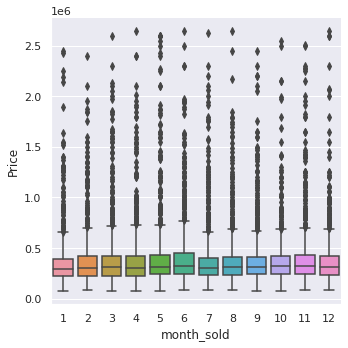

In [ ]:
sns.catplot(data=train, x="month_sold", y="Price", kind="box")

In [ ]:
train['structure_quality'].unique()

array([4, 2, 5, 1, 3])

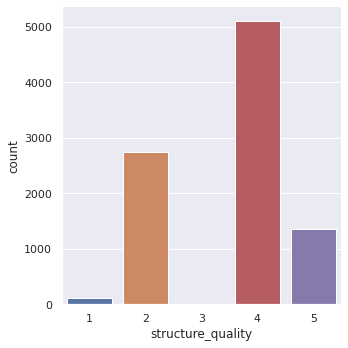

In [ ]:
sns.catplot(x='structure_quality', data=train, kind='count')

inference: highest selling is cat 4 and lowest is 3

In [ ]:
train['SUBCNTR_DI'].describe()

count      9334.000000
mean      41230.539929
std       22125.645149
min        1462.800000
25%       24295.275000
50%       41176.900000
75%       53832.525000
max      110553.800000
Name: SUBCNTR_DI, dtype: float64

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
               colname = corr_matrix.columns[i]                  
               col_corr.add(colname)
    return col_corr 

In [ ]:
x = correlation(train,0.75)
x

{'CNTR_DIST', 'SUBCNTR_DI', 'WATER_DIST'}

In [ ]:
train['LONGITUDE'] = train['LONGITUDE'].abs()

In [ ]:
train.columns

Index(['LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL',
       'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI',
       'HWY_DIST', 'age', 'avno60plus', 'month_sold', 'structure_quality',
       'Price'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL','RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI','HWY_DIST']] = scaler.fit_transform(train[['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL','RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI','HWY_DIST']])

In [ ]:
X = train.drop('Price',axis=1)
Y = train['Price']

In [ ]:
train_X,val_X,train_y,val_y=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.feature_selection import chi2
#Calculating Fscore and p value
f_p_values=chi2(train_X,train_y)
p_values=pd.Series(f_p_values[1])
p_values.index=train_X.columns
p_values.sort_index(ascending=False)

structure_quality    1.000000e+00
month_sold           7.876057e-40
avno60plus           1.000000e+00
age                  0.000000e+00
WATER_DIST           1.000000e+00
TOT_LVG_AREA         1.000000e+00
SUBCNTR_DI           1.000000e+00
SPEC_FEAT_VAL        1.000000e+00
RAIL_DIST            1.000000e+00
OCEAN_DIST           1.000000e+00
LONGITUDE            1.000000e+00
LND_SQFOOT           1.000000e+00
LATITUDE             1.000000e+00
HWY_DIST             1.000000e+00
CNTR_DIST            1.000000e+00
dtype: float64

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(train_X, train_y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_X.columns
mutual_info.sort_values(ascending=False)

structure_quality    0.825698
TOT_LVG_AREA         0.398029
LATITUDE             0.278570
OCEAN_DIST           0.261890
LONGITUDE            0.244746
CNTR_DIST            0.223583
SUBCNTR_DI           0.214404
SPEC_FEAT_VAL        0.156957
LND_SQFOOT           0.154642
WATER_DIST           0.144227
age                  0.117236
HWY_DIST             0.091386
RAIL_DIST            0.059355
month_sold           0.014381
avno60plus           0.002346
dtype: float64

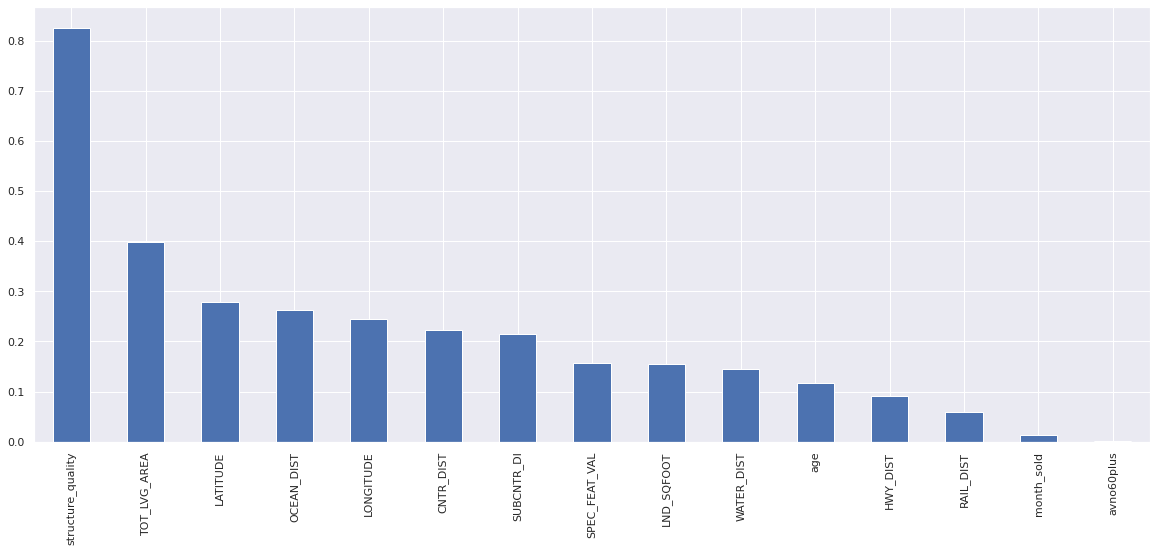

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
#Now we Will select the top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=11)
sel_ten_cols.fit(train_X, train_y)
train_X.columns[sel_ten_cols.get_support()]

Index(['LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'age',
       'structure_quality'],
      dtype='object')

In [ ]:
cols = ['LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'age',
       'structure_quality']

In [ ]:
X = train[cols]
y = train['Price']

In [ ]:
train_X,val_X,train_y,val_y=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
lr=LinearRegression()
lr.fit(train_X,train_y)
pred=lr.predict(val_X)
acc_log = round(lr.score(train_X, train_y) * 100, 2)

In [ ]:
acc_log

67.7

In [ ]:
rfr=RandomForestRegressor(random_state=1,n_estimators=200,max_features=5,max_depth=7,min_samples_leaf=2)
rfr.fit(train_X,train_y)
pred_rfr=rfr.predict(val_X)
acc_rfr = round(rfr.score(train_X, train_y) * 100, 2)
acc_rfr

92.34

In [ ]:
test_x = test.drop('id',axis=1)
test_x = test.drop('PARCELNO',axis=1)
test_x['LONGITUDE'] = test_x['LONGITUDE'].abs()

In [ ]:
test_x[['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL','RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI','HWY_DIST']] = scaler.fit_transform(test_x[['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL','RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI','HWY_DIST']])

In [ ]:
test_X = test_x[cols]

In [ ]:
price = rfr.predict(test_X)

In [ ]:
price

array([323157.80437077, 324332.37500568, 371917.77476663, ...,
       417618.56559222, 346668.9908343 , 410234.7524344 ])

In [ ]:
final_df = pd.concat([test['id'],pd.Series(price)],axis=1)
final_df= final_df.rename(columns = {0:'price'})

In [ ]:
final_df

,id,price
0,0,323157.804371
1,1,324332.375006
2,2,371917.774767
3,3,743353.229190
4,4,289179.608249
...,...,...
4593,4593,338946.901856
4594,4594,183884.428282
4595,4595,417618.565592
4596,4596,346668.990834


In [ ]:
train['Price'].describe()

count    9.334000e+03
mean     3.970245e+05
std      3.139433e+05
min      7.200000e+04
25%      2.350000e+05
50%      3.100000e+05
75%      4.249750e+05
max      2.650000e+06
Name: Price, dtype: float64

In [ ]:
final_df['price'].describe()

count    4.598000e+03
mean     4.088182e+05
std      2.877359e+05
min      1.571937e+05
25%      2.591182e+05
50%      3.194631e+05
75%      4.186062e+05
max      2.210301e+06
Name: price, dtype: float64

In [ ]:
final_df.to_csv('Submission3.csv',index=False)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(X_train,y_train,space):
    """
    Input : space : hyperopt param grid
    Output : Dict with loss value
    """
  
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = RandomForestRegressor(n_estimators = space['n_estimators'], max_depth=space['max_depth'],min_samples_leaf=space['min_samples_leaf'],max_features =space['max_features'])
    
    classifier.fit(X_train, y_train)

    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

In [ ]:

from functools import partial

In [ ]:
space = {'n_estimators':hp.choice('n_estimators',range(100,500,50)),
         'max_depth':hp.choice('max_depth',range(5,9,1)),
          'min_samples_leaf':hp.choice('min_samples_leaf',range(1,4,1)),
          'max_features':hp.choice('max_features',range(3,6,1))}

trials = Trials()

fmin_objective = partial(objective,train_X,train_y)

best = fmin(fn = fmin_objective,
            space = space,
            algo = tpe.suggest,
            max_evals = 10,
            trials = trials)

print("Best: ", best)

CrossValMean:
0.8702083380859797
CrossValMean:
0.8419190220212306
CrossValMean:
0.8608392224519446
CrossValMean:
0.8154787572505253
CrossValMean:
0.8725423767353707
CrossValMean:
0.8589165772814147
CrossValMean:
0.8710339101409911
CrossValMean:
0.8205182109128375
CrossValMean:
0.8730359744744385
CrossValMean:
0.8614248257271708
100%|██████████| 10/10 [05:41<00:00, 34.13s/it, best loss: 0.12696402552556152]
Best:  {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 0, 'n_estimators': 2}


In [ ]:
def retrain_and_save_the_model(name, space,X_train,y_train,X_test,y_test):
    """
    Input : name : Name for the model ex "model.pkl"
            space : best parameter grid
    Output : A trained XGBoost model 
    """
    print(f"best: {space}")
    
    reg = RandomForestRegressor(n_estimators = space['n_estimators'])
    
    reg.fit(X_train, y_train)

    accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
    CrossValMean = accuracies.mean()
    print("Final CrossValMean: ", CrossValMean)
    
    acc_rfr = round(rfr.score(X_train, y_train) * 100, 2)
    
    print(f"Accuracy Score: {acc_rfr}")
    return reg

In [ ]:
rf = retrain_and_save_the_model("rf.pkl",best,train_X,train_y,val_X,val_y)

best: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 0, 'n_estimators': 2}
Final CrossValMean:  0.8105468563177073
Accuracy Score: 92.34


In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 70, max_depth = 5               , min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [ ]:
rf.fit(train_X, train_y)

RandomForestRegressor(n_estimators=2)

In [ ]:
rf.score(val_X, val_y)

0.885682674150572

In [ ]:
price =rf.predict(test_X)

In [ ]:
price

array([325000., 364950., 403000., ..., 702500., 280850., 475000.])

In [ ]:
final_df = pd.concat([test['id'],pd.Series(price)],axis=1)
final_df= final_df.rename(columns = {0:'price'})

In [ ]:
final_df['price'].describe()

count    4.598000e+03
mean     4.118852e+05
std      3.268228e+05
min      7.500000e+04
25%      2.390000e+05
50%      3.150000e+05
75%      4.366500e+05
max      2.650000e+06
Name: price, dtype: float64

In [ ]:
train.Price.describe()

count    9.334000e+03
mean     3.970245e+05
std      3.139433e+05
min      7.200000e+04
25%      2.350000e+05
50%      3.100000e+05
75%      4.249750e+05
max      2.650000e+06
Name: Price, dtype: float64

In [ ]:
final_df.to_csv('Submission5.csv',index=False)